<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 3

### Problem 0 (3 points)

Group members:

Haoyang Ma

## Part 1: Basics of Image Motion 

### Problem 1.1 (Exam Style)

$u(t)=a $ 

$v(t)=b+2ct$

If $t=0$,$u(t)=10 \space pixels/frame,v(t)=-20 \space pixels/frame$

If $t=1$,$u(t)=10 \space pixels/frame,v(t)=4 \space pixels/frame$



### Problem 1.2 (Exam Style)



$\omega(t)=u(t)\times \frac {e_x}{e_x+e_y}+v(t)\times \frac {e_y}{e_x+e_y}=a\frac {e_x}{e_x+e_y}+(b+2ct)\frac {e_y}{e_x+e_y}$

if $t=0,\omega(0)=10\times \frac 3 5+(-20)\times \frac 4 5=-10\space pixels/frame$

### Problem 1.3 (Exam Style)

$e_t=u(t)\times e_x+v(t)\times e_y=ae_x+(b+2ct)e_y$

if $t=0,e_t=10\times 3+(-20)\times 4=-50$ gray levels per frame

### Problem 1.4 (Exam Style)

if $t=0$, the numerical value of $e_t^\prime$ is: $$e_t^\prime=u(t)\times e_x\prime+v(t)\times e_y\prime=ae_x\prime+(b+2ct)e_y\prime=10\times8+(-20)\times-6=200$$
Now we can get the following system of equations:

$$
\begin{equation}\begin{cases}
e_t &= u(t) \times e_x + v(t) \times e_y \\
e_t^\prime &= u(t) \times e_x^{\prime} + v(t) \times e_y^ \prime
\end{cases}\end{equation}
$$
Then we solve the equation, and get:

$$u=\frac{e_t e_y^\prime-e_t^\prime e_y}{e_x e_y\prime-e_x\prime e_y}$$

$$v=\frac{e_t e_x^\prime-e_t^\prime e_x}{e_y e_x\prime-e_y\prime e_x}$$

as a result,

$$u=\frac{-50\times -6-200\times 4}{3\times -6 - 8\times 4}=10\space pixels/frame$$

$$v=\frac{-50\times 8-200\times 3}{4\times 8 - 3\times -6}=-20\space pixels/frame$$

## Part 2: Exact World and Camera Simulation

In [1]:
import urllib.request
import ssl
from os import path as osp
import shutil


def retrieve(file_name, semester='spring24', homework=3):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci527/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [2]:
retrieve('ideal.py')

Using previously downloaded file ideal.py


In [3]:
from autograd import numpy as np
from matplotlib import pyplot as plt
from ideal import camera, world, make_image
from ideal import motion_field, show_field, stats
from ideal import displacement, show_image_pair

In [4]:
frame_number_0 = 0.
image_0, image_0_gradient = make_image(frame_number_0, camera, world, grad=True)

In [5]:
u = motion_field(frame_number_0, camera, world)

In [6]:
frame_delta = 10
frame_number_1 = frame_number_0 + frame_delta
image_1 = make_image(frame_number_1, camera, world)

In [7]:
d = displacement(frame_number_0, frame_number_1, camera, world)

### Problem 2.1 (Exam Style, Except for the Code)

In the image above, the orange points are the edge points of the object.

The reason for this phenomenon is that, even though we used precise motion fields and displacement fields during the perspective projection and inverse projection processes, small errors can still occur due to the non-linear nature of perspective deformation. Especially, due to the relative motion between the camera and the object, as well as the nature of perspective projection, some points may have slight differences in position during the projection and reverse projection process, leading to the endpoint errors we observe. The orange points indicate that the displacement vector d_back cannot fully offset the position changes caused by the previously applied displacement vector d during the process from grid_1 back to grid_0, and these orange points are typically located in areas where the motion changes most significantly due to perspective effects, here being the edges of the object.

## Part 3: The Lucas-Kanade Tracker

In [8]:
retrieve('LK.py')

Using previously downloaded file LK.py


In [9]:
from LK import default_parameters, show_parameters, track_and_compare

show_parameters(default_parameters, 'default ')

sigma = 0.01
noisy_0 = image_0 + sigma * np.random.random(image_0.shape)
noisy_1 = image_1 + sigma * np.random.random(image_1.shape)

Lucas-Kanade tracker default parameters:
	gaussian window size: 5
	feature window size: 31
	smallest acceptable step: 0.001
	maximum number of iterations: 100



tracking of point 0: [150, 107] with window size 11 failed
point 1: [100, 120] -> [ 99.722 118.432], window size 11
	computed displacement: [-0.278 -1.568]
	true displacement: [-0.277 -1.577]
	end-point error: 0.009 pixels
point 2: [150, 150] -> [148.225 147.705], window size 11
	computed displacement: [-1.775 -2.295]
	true displacement: [-1.509 -2.26 ]
	end-point error: 0.268 pixels
tracking of point 3: [150, 193] with window size 11 failed


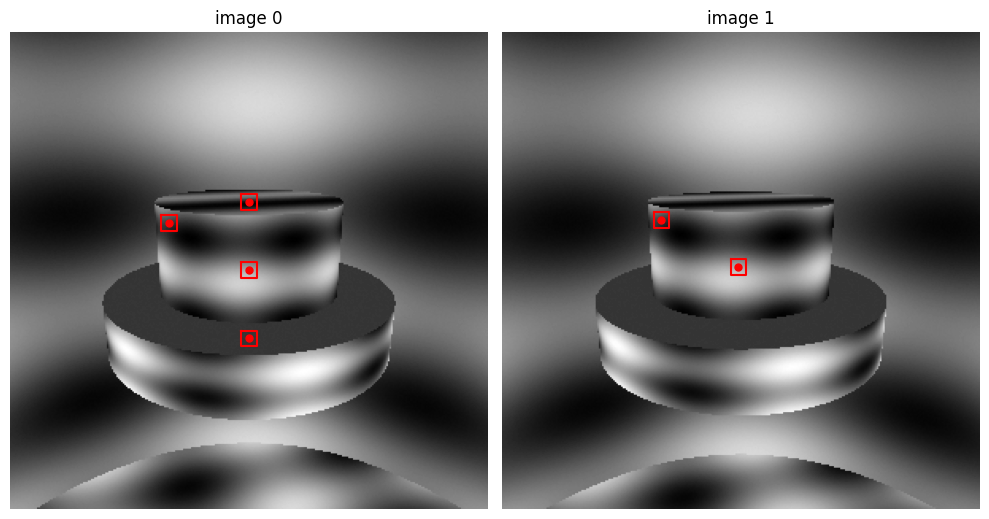

In [10]:
points_and_window_sizes = (
    ([150, 107], 11),
    ([100, 120], 11),
    ([150, 150], 11),
    ([150, 193], 11)
)
track_and_compare(noisy_0, noisy_1, points_and_window_sizes, d)

### Problem 3.1 (Exam Style)

Reasons for the failure of tracking points 0 and 3:

The failure of point 0 ([150, 107]): Point 0 is located in a region of the image with sparse texture, resulting in insufficient image gradients within the Gaussian window near this point to provide enough information for effective displacement estimation. The Lucas-Kanade algorithm relies on image gradients to calculate the displacement of each point, and since the variation within the window's range at this point is minimal, the algorithm fails to track it.

The failure of point 3 ([150, 193]): Point 3 fails for a similar reason, being located in a low-texture area of the image, which results in insufficient surrounding image gradients, leading to tracking failure.

In the Lucas-Kanade tracking algorithm, the Newton-Raphson method is used to minimize the sum of squared differences (SSD) between displacements in images. In the Newton-Raphson method, the condition number of the system matrix A serves as an indicator of how suitable this matrix is for solving linear equations. A high condition number means that the matrix is close to singular, or in other words, the matrix is almost non-invertible. For the Newton-Raphson method, if the system matrix A to be solved has a high condition number, finding the optimal solution during the iteration process may encounter difficulties. This is because the algorithm attempts to find a direction and step size to approximate the solution at each step, but if the condition number is high, the algorithm may "lose direction" during the approximation process, leading to a failure in finding the solution.

### Problem 3.2 (Exam Style Except for the Code)


tracking of point 0: [150, 107] with window size 11 failed
point 1: [100, 120] -> [100.628 118.781], window size 31
	computed displacement: [ 0.628 -1.219]
	true displacement: [-0.277 -1.577]
	end-point error: 0.973 pixels
point 2: [150, 150] -> [148.487 147.775], window size 31
	computed displacement: [-1.513 -2.225]
	true displacement: [-1.509 -2.26 ]
	end-point error: 0.036 pixels
tracking of point 3: [150, 193] with window size 11 failed


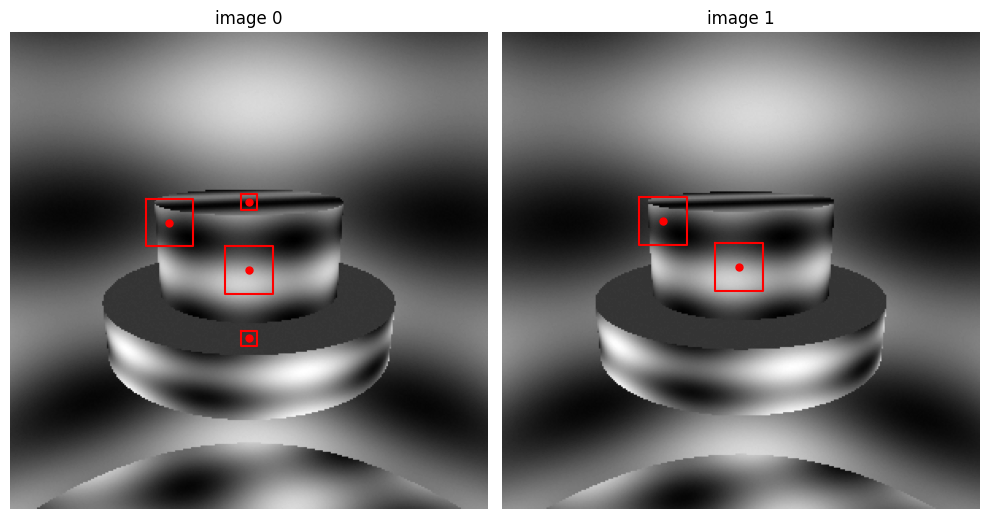

In [11]:
points_and_window_sizes = (
    ([150, 107], 11),
    ([100, 120], 31),
    ([150, 150], 31),
    ([150, 193], 11)
)
track_and_compare(noisy_0, noisy_1, points_and_window_sizes, d)

Point 1 ([100, 120]): The window for point 1 is too large, extending beyond the local range of the image features, introducing background noise and irrelevant image features (on the left side of the window), which in turn increase endpoint error.

Point 2 ([150, 150]): The area around point 2 has sufficient texture information, and increasing the window size improves tracking accuracy because the algorithm can utilize more image features for displacement estimation. This helps to reduce the impact of noise and decrease endpoint error.

## Part 4: Good Features to Track

### Problem 4.1

In [12]:
import skimage as sk


name = 'fauci_0.png'
retrieve(name)
frame = sk.io.imread(name)

Using previously downloaded file fauci_0.png


In [13]:
import numpy as np
from scipy.signal import convolve2d
from skimage import io
import matplotlib.pyplot as plt


def gaussian_kernel(sigma):
    """generate a 1D Gaussian kernel and its derivative."""
    h = int(round(3.5 * sigma))
    x = np.arange(-h, h+1)
    gauss_kernel = np.exp(-(x**2) / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)
    gauss_kernel_deriv = -x / (sigma**3) * np.exp(-(x**2) / (2 * sigma**2)) / np.sqrt(2 * np.pi)
    return gauss_kernel / np.sum(gauss_kernel), gauss_kernel_deriv

def image_gradient(image, sigma):
    gauss_kernel, gauss_kernel_deriv = gaussian_kernel(sigma)
    
    # gaussian smoothing - vertical direction
    smoothed_vertical = convolve2d(image, gauss_kernel[:, np.newaxis], mode='valid')
    # gaussian derivative - horizontal direction
    gradient_x = convolve2d(smoothed_vertical, gauss_kernel_deriv[np.newaxis, :], mode='valid')
    
    # gaussian smoothing - horizontal direction
    smoothed_horizontal = convolve2d(image, gauss_kernel[np.newaxis, :], mode='valid')
    # gaussian derivative - vertical direction
    gradient_y = convolve2d(smoothed_horizontal, gauss_kernel_deriv[:, np.newaxis], mode='valid')
    
    # magnitude and direction
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x)
    
    return magnitude, direction



def good_features(image, h, tau, d_min, n_max, sigma=2.):
    """Find good features in an image."""
    Ix, Iy = image_gradient(image, sigma)

    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix * Iy   
    
    # Compute the structure tensor
    kernel = np.ones((2*h+1, 2*h+1))
    A11 = convolve2d(Ixx, kernel, mode='valid')
    A22 = convolve2d(Iyy, kernel, mode='valid')
    A12 = convolve2d(Ixy, kernel, mode='valid')

    
    det_A = A11 * A22 - A12**2
    trace_A = A11 + A22
    delta = np.sqrt(trace_A**2 - 4 * det_A)
    lambda_min = 0.5 * (trace_A - delta)
                
    # Select good features based on eigenvalues, distance, and limit on number.
    candidates = np.argwhere(lambda_min > tau)

    values = lambda_min[lambda_min > tau]

    # Sort candidates by eigenvalue
    indices = np.argsort(-values)

    selected = []
    
    for idx in indices:
        pt = candidates[idx]
        if not selected:
            selected.append(pt)
        else:
            if all(np.linalg.norm(pt - np.array(selected), axis=1) >= d_min):
                selected.append(pt)
        if len(selected) >= n_max:
            break
    print('Selected {} features'.format(len(selected)))
            
    return np.array(selected)


Selected 30 features


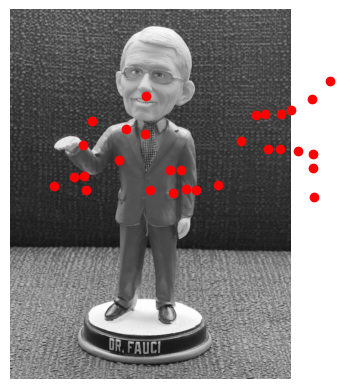

In [14]:
half_window, min_ev, min_distance, n = 5, 0., 25, 30
features = good_features(frame.astype(float), half_window, min_ev, min_distance, n)

plt.imshow(frame, cmap='gray')
plt.plot([f[0] for f in features], [f[1] for f in features], 'ro')
plt.axis('off')
plt.show()

## Part 5: Basic Vector Geometry

### Problem 5.1 (Exam Style)

$c=(2\times5 - 6\times0,3\times5-4\times6,3\times0-2\times4)^T=(10,-9,-8)^T$



### Problem 5.2 (Exam Style)

$d=\frac{a \cdot b}{b \cdot b} \cdot b=\frac {42} {41} (4,0,5)^T$

$e=\frac{a \cdot b}{a \cdot a} \cdot a=\frac {6} {7} (3,2,6)^T$

### Problem 5.3 (Exam Style)

The characteristics of a rotation matrix include:

Orthogonality: $AA^t=A^TA=I$, where $I$ is the identity matrix

Determinant of 1: $det(A)=1$



$det(A)=\frac 1 {64}[2\sqrt3\times（-3\times2\sqrt3-2\times\sqrt 3)-2\times (\sqrt3\times 2\sqrt3-2\times -1)+0] \\ =\frac 1 {64}(-48-16)\\=-1$

so A is not a rotation, and we also get:

$det(-A)=(-1)^3\frac {1} {64}[2\sqrt3\times（-3\times2\sqrt3-2\times\sqrt 3)-2\times (\sqrt3\times 2\sqrt3-2\times -1)+0] \\ =-\frac {1} {64}(-48-16)\\=1$

The transpose of matrix $-A$, denoted as $-A^T$, is:

$$-A^T = \frac {1} {4}\left[\begin{array}{rrr}
    2\sqrt3 & \sqrt3 & -1 \\
    2 & -3 & \sqrt3 \\
    0 & 2 & 2\sqrt3
\end{array}\right]$$

so $$-A(-A^T)=(-\frac {1} {4})^2\left[\begin{array}{rrr}
    12+3+1 & 0 & 0 \\
    0 & 4+9+3 & 0 \\
    0 & 0 & 4+12
\end{array}\right]\\=(-\frac {1} {4})^2\left[\begin{array}{rrr}
    16 & 0 & 0 \\
    0 & 16 & 0 \\
    0 & 0 & 16
\end{array}\right]\\=\left[\begin{array}{rrr}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{array}\right]\\=I$$

$$(-A^T)(-A)=(-\frac {1} {4})^2\left[\begin{array}{rrr}
    4+12 & 0 & 0 \\
    0 & 3+9+4 & 0 \\
    0 & 0 & 1+3+12
\end{array}\right]\\=(-\frac {1} {4})^2\left[\begin{array}{rrr}
    16 & 0 & 0 \\
    0 & 16 & 0 \\
    0 & 0 & 16
\end{array}\right]\\=\left[\begin{array}{rrr}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{array}\right]\\=I$$

we get $(-A^T)(-A)=-A(-A^T)$, which means $-A$ is an orthogonal matrix, so it is a rotation.